<center><img src="https://media-exp1.licdn.com/dms/image/C4E22AQEbIXZiRVkJPQ/feedshare-shrink_2048_1536/0?e=1605139200&v=beta&t=opmJLG_veDflQesF9uJvIhSXbmwPY3DGSlbZo1v-w2k" width="1000"></center>

# Programa de Especialización en Python

## Tema 2. Análisis jerarquico: caso práctico

### Prof. Manuel Sigüeñas, M.Sc.(c)
[msguenas@socialdata-peru.com](msguenas@socialdata-peru.com)

## Cluster Jerárquico

<br>

- Cargar Librerías

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

- Importar la Data

In [4]:
dataset = pd.read_csv('D:/SOCIAL DATA/Dropbox/Python 5ta edición - Programa Completo/2. intermedio/sesión_2/caso 2/Mall_Customers.csv')
X = dataset.iloc[:, [3, 4]].values ## Separar las variables a utilizar
##Solo utilizaremos las variables "Annual Income" y "Spending Score"
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
len(dataset)

200

Nota: La data trata del puntaje crediticio de unos clientes del banco, junto con sus ingresos anuales y su sexo.

- Estandarizar la data

In [4]:
from sklearn.preprocessing import StandardScaler ## llamamos a la función "sklearn.preprocessing" con el nombre de "StandardScaler"
sc_X = StandardScaler() ## almacenamos la función en un objeto
X=sc_X.fit_transform(X)## estandarizamos

- Usamos el dendograma para buscar el número optimo de gluster

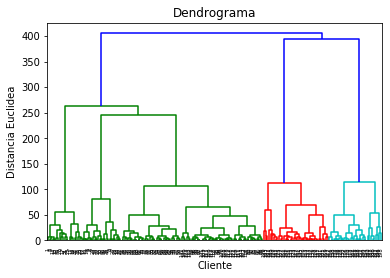

In [6]:
import scipy.cluster.hierarchy as sch ## llamamos a la función y la renombramos como sch 
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward')) ## Usamos el método WARD
plt.title('Dendrograma') ## asignamos nombre al título
plt.xlabel('Cliente')  ## asignamos nombre al eje x
plt.ylabel('Distancia Euclidea') ## asignamos nombre al eje y
plt.show() ## Visualizamos el plot

-  Ajustar el agrupamiento jerárquico al conjunto de datos

In [7]:
from sklearn.cluster import AgglomerativeClustering ## llamamos a la función y le asignamos el nombre de "AgglomerativeClustering"
hc = AgglomerativeClustering(n_clusters = 5, 
                             affinity = 'euclidean', 
                             linkage = 'ward')## realizamos la glusterización por ward, con 5 clusters
y_hc = hc.fit_predict(X)## almacenamos en un objeto la clasificación de cada observación.

In [8]:
y_hc

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

In [10]:
from sklearn.metrics import euclidean_distances, silhouette_score

Text(0.5, 1.0, 'Silouette para data distritos')

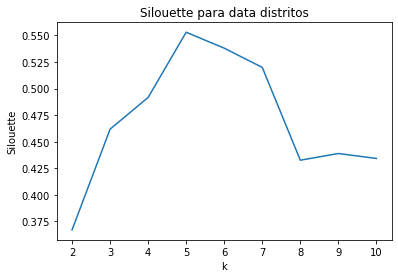

In [11]:
s = []

for n_clusters in range(2,11):
    hc = AgglomerativeClustering(n_clusters = n_clusters, 
                             affinity = 'euclidean', 
                             linkage = 'ward')
    #hc.fit(X)

    #labels = hc.fit_predict(X)
    #centroids = kmeans.cluster_centers_

    s.append(silhouette_score(X, hc.fit_predict(X)))#X estandarizado

plt.plot(range(2, 11),s)
plt.ylabel("Silouette")
plt.xlabel("k")
plt.title("Silouette para data distritos")
#sns.despine()

- Visualizar el Gluster

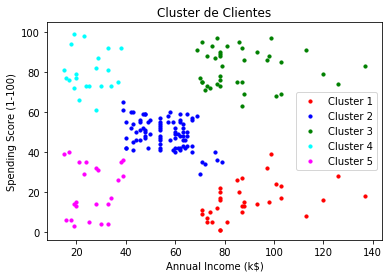

In [12]:
##Asignamos a cada grupo un color, para visualizarlo
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 10, c = 'red', label = 'Cluster 1') 
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 10, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 10, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 10, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 10, c = 'magenta', label = 'Cluster 5')
plt.title('Cluster de Clientes') ## asignamos un título
plt.xlabel('Annual Income (k$)') ## asignamos un nombre al eje x
plt.ylabel('Spending Score (1-100)') ## asignamos un nombre al eje y
plt.legend() ## activamos la legenda
plt.show() ## mostramos el gráfico

## CASO PRACTICO: índice democracias

La Unidad de Inteligencia de The Economist (EIU, por sus siglas en inglés) publica desde 2006 el Índice de Democracia, una rigurosa y reconocida clasificación que pretende determinar con base en un estudio, el nivel y la calidad de la democracia en 165 estados independientes y dos territorios. Este índice se basa en cinco categorías como indicadores fundamentales: proceso electoral y pluralismo (ppelec); libertades civiles (libciv); funcionamiento del gobierno (fdelgob); participación política (partpk); y cultura política (cultpk). De acuerdo con los resultados obtenidos en su edición de 2010 (DATA CONSULTADA), se clasifica a cada país como “democracia completa”, “democracia defectuosa”, “régimen híbrido” o “régimen autoritario”.

Nosotros tomamos la referente países de latinoamérica para realizar un análisis de conglomerados que nos permita agrupar a nuestros países en función a los indicadores medidos.


Actividades:

1. Número óptimo de clúster para cada una de las funciones de enlace.
2. Data Frame donde se muestre la data incial y la etiqueta de clúster teniendo en cuenta como enlace "Ward", "average" y "complete". Cosiderar distancia coseno para "average" y "complete".
3. Realizando un análisis de componentes principales, visualizar las etiquetas predichas.
4. Teniendo en cuenta el enlace "ward" realizar un análisis clúster aglomerativo de k = 4 (k criterio de experto).